In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
# pip install pandas_profiling
import pandas_profiling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
col_names =["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]


train = pd.read_table("train.txt",sep=",", header=None, names = col_names)
test = pd.read_table("test.txt",sep=",", header=None, names = col_names)

In [4]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [11]:
train_final = train.merge(test.drop_duplicates(subset=['duration']), how='left')
train_final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [12]:

mapping ={'back':'DoS','land':'DoS','neptune':'DoS','pod':'DoS','smurf':'DoS','teardrop':'DoS','apache2':'DoS', 'udpstorm':'DoS','processtable':'DoS','worm':'DoS','satan':'Probe','ipsweep':'Probe','nmap':'Probe','portsweep':'Probe','mscan':'Probe','saint':'Probe','guess_passwd':'R2L','ftp_write':'R2L','imap':'R2L','phf':'R2L','multihop':'R2L','warezmaster':'R2L','warezclient':'R2L','spy':'R2L',
'xlock':'R2L','xsnoop':'R2L','snmpguess':'R2L','snmpgetattack':'R2L','httptunnel':'R2L','sendmail':'R2L','named':'R2L','buffer_overflow':'U2R','loadmodule':'U2R','rootkit':'U2R','perl':'U2R','sqlattack':'U2R','xterm':'U2R','ps':'U2R'}


train_final['attack_1']=train_final['attack'].replace(mapping)
train_final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_1
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,DoS


In [15]:
train_final = train_final.assign(attack = train_final.attack_1)
train_final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_1
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS,20,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,20,DoS


In [17]:
train_final['attack_2']=pd.factorize(train_final['attack_1'],sort = True)[0]+1
train_final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_1,attack_2
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,5
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,5
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19,DoS,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,5
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,20,DoS,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal,5
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal,5
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,20,DoS,1


In [18]:
train_final = train_final.drop(['attack_1'],axis =1)
train_final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_2
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,5
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,5
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,5
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS,20,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,5
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,5
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,20,1


In [19]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 44 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [30]:
train_final_attack= pd.DataFrame(train_final.attack.value_counts())
train_final_attack

,attack
normal,67343
DoS,45927
Probe,11656
R2L,995
U2R,52


In [24]:
train_final_count = train_final[['attack','attack_2']].groupby(['attack','attack_2']).size().reset_index()
train_final_count

,attack,attack_2,0
0,DoS,1,45927
1,Probe,2,11656
2,R2L,3,995
3,U2R,4,52
4,normal,5,67343


In [43]:
# profiling using pandas profiling
report = pandas_profiling.ProfileReport(train_final)

In [44]:
report.to_file(output_file = 'profilereport_multi.html')

### Basic Exploratory Analysis

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

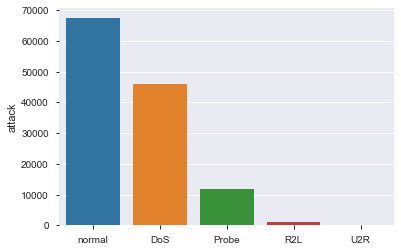

In [32]:
sns.barplot( train_final_attack.index, train_final_attack.attack )

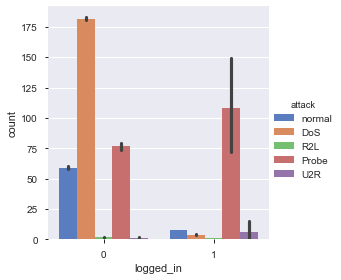

In [38]:
train_final_count = train_final[['attack','attack_2']].groupby(['attack','attack_2']).size().reset_index()
train_final_count.columns = ['logged_in', 'attack', 'count']

sns.catplot(x="logged_in", y = 'count', hue="attack", data = train_final,
               height=4, kind="bar", palette="muted")

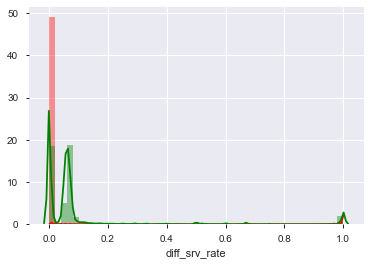

In [40]:
sns.distplot( train_final[train_final.logged_in == 1]['diff_srv_rate'], color = 'r')
sns.distplot( train_final[train_final.logged_in == 0]['diff_srv_rate'], color = 'g')

### identifying relationships (between Y & numerical independent variables by comparing means)

In [42]:
train_final.groupby('attack_2').mean().T

attack_2,1,2,3,4,5
duration,0.006227,2074.858185,633.417085,80.942308,168.587396
src_bytes,1176.321162,385679.838367,307727.300503,906.230769,13133.279331
dst_bytes,169.201537,181074.911805,81822.026131,5141.961538,4329.685223
land,0.000392,0.000000,0.000000,0.000000,0.000104
wrong_fragment,0.062229,0.000000,0.000000,0.000000,0.000000
urgent,0.000000,0.000000,0.003015,0.019231,0.000148
hot,0.039889,0.001630,8.334673,1.403846,0.230655
num_failed_logins,0.000000,0.000343,0.056281,0.019231,0.001381
logged_in,0.020837,0.007121,0.913568,0.884615,0.710646
num_compromised,0.019226,0.000601,0.077387,1.211538,0.507076


In [45]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 44 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [46]:
numeric_var_names=[key for key in dict(train_final.dtypes) if dict(train_final.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train_final.dtypes) if dict(train_final.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag', 'attack_2']
['protocol_type', 'service', 'flag', 'attack']


In [47]:
train_final_num=train_final[numeric_var_names]
train_final_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_2
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,5
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,5
2,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,5
4,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,5


In [48]:
train_final_cat=train_final[cat_var_names]
train_final_cat.head()

,protocol_type,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,DoS
3,tcp,http,SF,normal
4,tcp,http,SF,normal


### Creating Data audit Report

In [49]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_final_num.apply(lambda x: var_summary(x)).T

In [50]:
num_summary.round()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.0,0.0,2605.0,6.783500e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9591.0,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45567.0,44.0,5870331.0,3.446079e+13,0.0,0.0,0.0,0.0,0.0,44.0,276.0,848.0,1480.0,54540.0,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.0,0.0,4021269.0,1.617061e+13,0.0,0.0,0.0,0.0,0.0,0.0,516.0,3376.0,8314.0,25519.0,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.0,0.0,2.0,5.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.0,0.0,24.0,5.730000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.479000e+03


In [51]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

train_final_num=train_final_num.apply(lambda x: outlier_capping(x))

In [54]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

train_final_num=train_final_num.apply(lambda x: Missing_imputation(x))

In [60]:
train_final_num_c=train_final_num.columns.difference(['land','wrong_fragment','urgent','num_failed_logins','is_guest_login','is_host_login','num_outbound_cmds','num_access_files','num_shells','num_file_creations','num_root','su_attempted','root_shell'])
train_final_num_c

Index(['attack_2', 'count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'duration', 'hot', 'last_flag', 'logged_in',
       'num_compromised', 'rerror_rate', 'same_srv_rate', 'serror_rate',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate',
       'srv_serror_rate'],
      dtype='object')

In [61]:
train_final_num_c=train_final_num [['attack_2', 'count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'duration', 'hot', 'last_flag', 'logged_in',
       'num_compromised', 'rerror_rate', 'same_srv_rate', 'serror_rate',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate',
       'srv_serror_rate']]
train_final_num_c

,attack_2,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,...,logged_in,num_compromised,rerror_rate,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate
0,5,2,0.00,0,150,0.03,0.05,0.17,0.17,0.00,...,0,0,0.0,1.00,0.0,491,2,0.00,0.0,0.0
1,5,13,0.15,0,255,0.60,0.00,0.88,0.00,0.00,...,0,0,0.0,0.08,0.0,146,1,0.00,0.0,0.0
2,1,123,0.07,0,255,0.05,0.00,0.00,0.10,1.00,...,0,0,0.0,0.05,1.0,0,6,0.00,0.0,1.0
3,5,5,0.00,8153,30,0.00,0.00,0.03,1.00,0.03,...,1,0,0.0,1.00,0.2,232,5,0.00,0.0,0.2
4,5,30,0.00,420,255,0.00,0.00,0.00,1.00,0.00,...,1,0,0.0,1.00,0.0,199,32,0.09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,184,0.06,0,255,0.06,0.00,0.00,0.10,1.00,...,0,0,0.0,0.14,1.0,0,25,0.00,0.0,1.0
125969,5,2,0.00,145,255,0.01,0.00,0.01,0.96,0.00,...,0,0,0.0,1.00,0.0,105,2,0.00,0.0,0.0
125970,5,1,0.00,384,255,0.06,0.01,0.00,0.12,0.72,...,1,0,0.0,1.00,0.0,2231,1,0.00,0.0,0.0
125971,1,144,0.05,0,255,0.05,0.00,0.00,0.03,1.00,...,0,0,0.0,0.06,1.0,0,8,0.00,0.0,1.0


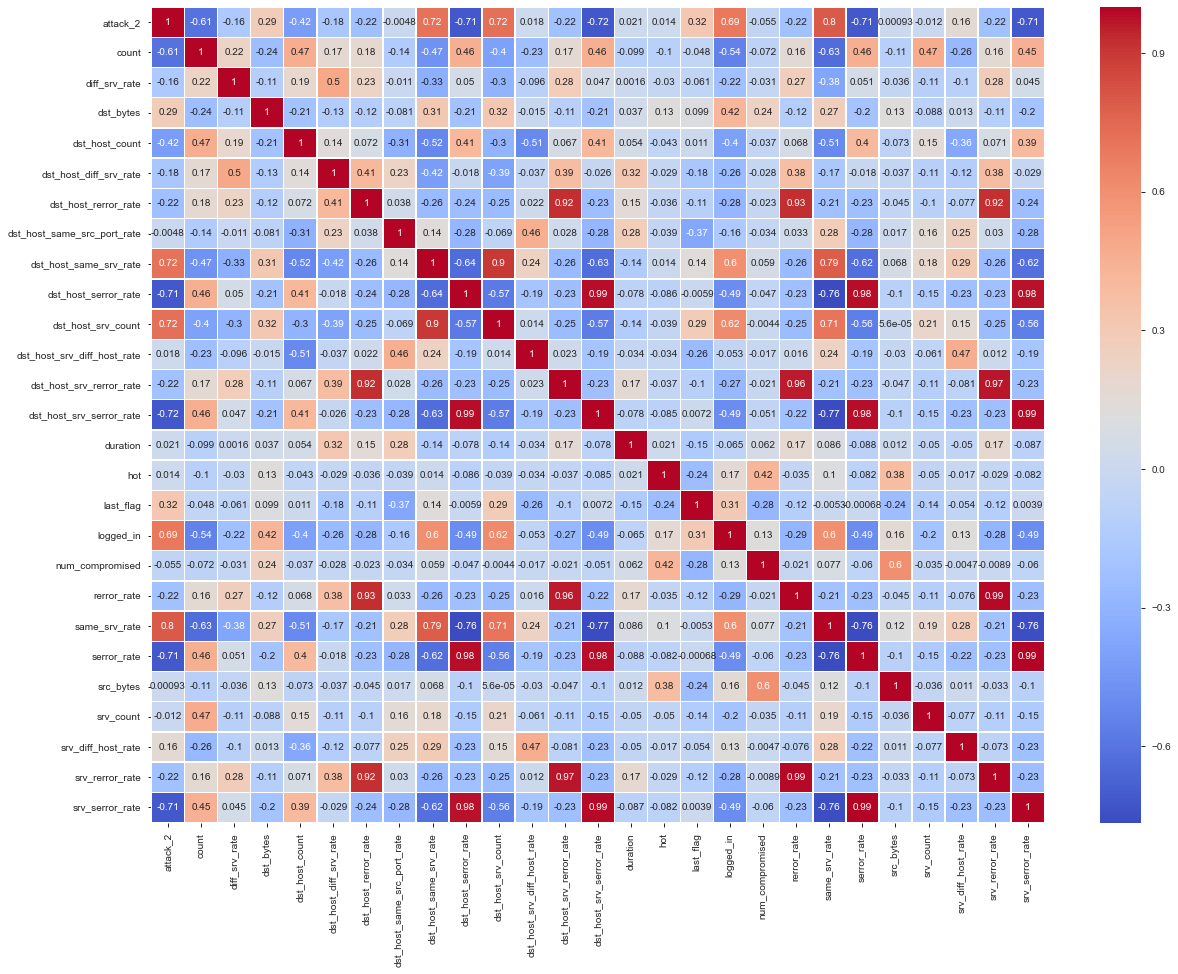

In [62]:
import seaborn as sns
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(train_final_num_c.corr(),annot=True,cmap='coolwarm',linewidths=0.5)

In [63]:
# Create Data audit Report for categorical variables for test
def cat_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2),x.value_counts(),x.unique()], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT','ColumnNames','UniqueValues'])
cat_summary_train=train_final_cat.apply(lambda x:cat_summary(x))
cat_summary_train.T

,N,NMISS,MODE,FREQ,PERCENT,ColumnNames,UniqueValues
protocol_type,125973,0,tcp,102689,81.52,tcp 102689 udp 14993 icmp 8291 N...,"[tcp, udp, icmp]"
service,125973,0,http,40338,32.02,http 40338 private 21853 domain_u...,"[ftp_data, other, private, http, remote_job, n..."
flag,125973,0,SF,74945,59.49,SF 74945 S0 34851 REJ 1123...,"[SF, S0, REJ, RSTR, SH, RSTO, S1, RSTOS0, S3, ..."
attack,125973,0,normal,67343,53.46,normal 67343 DoS 45927 Probe 1165...,"[normal, DoS, R2L, Probe, U2R]"


In [65]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    #col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [66]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [71]:
#for c_feature in categorical_features
train_final_cat_new = train_final_cat
for c_feature in cat_var_names:
    train_final_cat_new[c_feature] = train_final_cat_new[c_feature].astype('category')
    train_final_cat_new = create_dummies(train_final_cat_new , c_feature )

In [75]:
train_final_cat_new .head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_Probe,attack_R2L,attack_U2R,attack_normal
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [92]:
train_final_new=pd.concat([train_final_cat_new,train_final_num],axis=1)

In [93]:
train_final_new.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_2
0,1,0,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,5
1,0,1,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,5
2,1,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,1,0,0,0,0,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,5
4,1,0,0,0,0,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,5


In [94]:
train_final_new.columns

Index(['protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf',
       ...
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag',
       'attack_2'],
      dtype='object', length=125)

##### Feature Selection

#### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [95]:
train_final_new2 = train_final_new.drop(['num_outbound_cmds','is_host_login','land','urgent','num_shells','root_shell','su_attempted','num_failed_logins','is_guest_login','num_access_files','dst_host_srv_diff_host_rate','diff_srv_rate','dst_host_diff_srv_rate','wrong_fragment','srv_diff_host_rate','dst_host_rerror_rate','dst_host_same_src_port_rate','dst_bytes','dst_host_same_srv_rate','dst_host_srv_serror_rate','num_outbound_cmds','dst_host_serror_rate','duration','num_root','srv_rerror_rate','hot','srv_serror_rate','dst_host_srv_rerror_rate','rerror_rate','num_compromised','same_srv_rate','serror_rate','num_file_creations','src_bytes'], axis=1)
train_final_new2

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_R2L,attack_U2R,attack_normal,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,last_flag,attack_2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,2,150,25,20,5
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,13,1,255,1,15,5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,123,6,255,26,19,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,5,5,30,255,21,5
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,30,32,255,255,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,184,25,255,25,20,1
125969,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,2,2,255,244,21,5
125970,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,255,30,18,5
125971,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,144,8,255,8,20,1


In [96]:
train_final_new2.columns

Index(['protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_harvest', 'service_hostnames', 'service_http',
       'service_http_2784', 'service_http_443', 'service_http_8001',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_dgm', 'service_netbios_ns',
       'service_netbios_ssn', 'service_netstat', 'service_nnsp',
       'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump',
       'service_pop_2', 'service_pop_3', 'service_printer', 'se

### Variable Reduction using univariate Regression (short list based on Somer's D values)

In [97]:
train_final_new3 =train_final_new2.loc[:,["logged_in","count","srv_count","dst_host_count","dst_host_srv_count","protocol_type_tcp","protocol_type_udp","last_flag","flag_REJ",
       "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1","flag_S2", "flag_S3", "flag_SF", "flag_SH","service_X11", "service_Z39_50", "service_aol",
       "service_auth", "service_bgp", "service_courier", "service_csnet_ns","service_ctf", "service_daytime", "service_discard", "service_domain",
       "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i","service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_harvest",
       "service_hostnames", "service_http", "service_http_2784","service_http_443", "service_http_8001", "service_imap4",
       "service_iso_tsap", "service_klogin", "service_kshell", "service_ldap","service_link", "service_login", "service_mtp", "service_name",
       "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn","service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
       "service_other", "service_pm_dump", "service_pop_2", "service_pop_3","service_printer", "service_private", "service_red_i",
       "service_remote_job", "service_rje", "service_shell", "service_smtp","sefrvice_sql_net", "service_ssh", "service_sunrpc", "service_supdup",
       "service_systat", "service_telnet", "service_tftp_u", "service_tim_i","service_time", "service_urh_i", "service_urp_i", "service_uucp",
       "service_uucp_path", "service_vmnet", "service_whois","attack_2"]]
train_final_new3

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_tcp,protocol_type_udp,last_flag,flag_REJ,flag_RSTO,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,attack_2
0,0,2,2,150,25,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,13,1,255,1,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,123,6,255,26,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,5,5,30,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,5
4,1,30,32,255,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,184,25,255,25,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,1
125969,0,2,2,255,244,0,1,21,0,0,...,0,0,0,0,0,0,0,0,0,5
125970,1,1,1,255,30,1,0,18,0,0,...,0,0,0,0,0,0,0,0,0,5
125971,0,144,8,255,8,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,1


### Variable Reduction using Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [101]:
train_final_new1 =train_final_new3.loc[:,["logged_in","count","srv_count","dst_host_count","dst_host_srv_count","protocol_type_tcp","protocol_type_udp","last_flag","flag_REJ",
       "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1","flag_S2", "flag_S3", "flag_SF", "flag_SH","service_X11", "service_Z39_50", "service_aol",
       "service_auth", "service_bgp", "service_courier", "service_csnet_ns","service_ctf", "service_daytime", "service_discard", "service_domain",
       "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i","service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_harvest",
       "service_hostnames", "service_http", "service_http_2784","service_http_443", "service_http_8001", "service_imap4",
       "service_iso_tsap", "service_klogin", "service_kshell", "service_ldap","service_link", "service_login", "service_mtp", "service_name",
       "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn","service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
       "service_other", "service_pm_dump", "service_pop_2", "service_pop_3","service_printer", "service_private", "service_red_i",
       "service_remote_job", "service_rje", "service_shell", "service_smtp", "service_ssh", "service_sunrpc", "service_supdup",
       "service_systat", "service_telnet", "service_tftp_u", "service_tim_i","service_time", "service_urh_i", "service_urp_i", "service_uucp",
       "service_uucp_path", "service_vmnet", "service_whois","attack_2"]]
train_final_new1.head()

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_tcp,protocol_type_udp,last_flag,flag_REJ,flag_RSTO,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,attack_2
0,0,2,2,150,25,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,13,1,255,1,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,123,6,255,26,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,5,5,30,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,5
4,1,30,32,255,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,5


In [102]:
train_final_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 87 columns):
logged_in              125973 non-null int64
count                  125973 non-null int64
srv_count              125973 non-null int64
dst_host_count         125973 non-null int64
dst_host_srv_count     125973 non-null int64
protocol_type_tcp      125973 non-null uint8
protocol_type_udp      125973 non-null uint8
last_flag              125973 non-null int64
flag_REJ               125973 non-null uint8
flag_RSTO              125973 non-null uint8
flag_RSTOS0            125973 non-null uint8
flag_RSTR              125973 non-null uint8
flag_S0                125973 non-null uint8
flag_S1                125973 non-null uint8
flag_S2                125973 non-null uint8
flag_S3                125973 non-null uint8
flag_SF                125973 non-null uint8
flag_SH                125973 non-null uint8
service_X11            125973 non-null uint8
service_Z39_50         125973 non-

In [110]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = train_final_new1[train_final_new1.columns.difference(['attack_2'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, train_final_new1[['attack_2']] )

print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False False  True  True False False False  True
 False  True  True  True  True False False False False False False False
 False False False False  True False  True  True False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False]
[ 1  9  2  1 15 16  1  1 19 60 57  1 11  1  1  1  1 54 18 71 14 22 13 35
 37 40 38 52  1 48  1  1 21 24 10  6  1 50 69 41  4 72 20 70 31 28 23 39
 33 44 27 51 46 43 47 49 53 17 55 32  1 62 66 25 61  1 65 58 59 64  3 56
 45 36 42  7 68 67 34 63  8 12 26 29 30  5]


In [104]:
X.columns

Index(['count', 'dst_host_count', 'dst_host_srv_count', 'flag_REJ',
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'last_flag', 'logged_in',
       'protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_harvest', 'service_hostnames', 'service_http',
       'service_http_2784', 'service_http_443', 'service_http_8001',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_dgm', 'service_ne

In [105]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [106]:
RFE_features

Index(['count', 'flag_REJ', 'flag_RSTR', 'flag_S0', 'flag_SF', 'last_flag',
       'logged_in', 'protocol_type_tcp', 'protocol_type_udp',
       'service_domain_u', 'service_eco_i', 'service_ecr_i',
       'service_ftp_data', 'service_other', 'service_private'],
      dtype='object')

### Variable reduction using Select K-Best technique

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [111]:
X = train_final_new1[train_final_new1.columns.difference(['attack_2'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_final_new1[['attack_2']] )

In [112]:
X_new.get_support()

array([ True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [113]:
X_new.scores_

array([2.14284319e+04, 9.43292593e+03, 3.46239524e+04, 1.66053881e+03,
       3.34952321e+02, 2.54786282e+02, 5.65940224e+03, 5.51315801e+04,
       7.62261305e+01, 2.08987014e+01, 1.29550671e+01, 5.68132279e+04,
       6.48709899e+02, 1.92672129e+04, 3.19592485e+04, 3.07927309e+03,
       1.93979328e+03, 1.18508349e+01, 3.67700176e+02, 4.90443035e+00,
       1.45875439e+02, 2.99333382e+02, 3.14045579e+02, 2.24451089e+02,
       2.17230993e+02, 2.06620544e+02, 2.14119490e+02, 1.74185480e+02,
       2.26306980e+03, 1.68413546e+02, 1.27169511e+04, 1.10376662e+03,
       2.04156200e+02, 1.96718139e+02, 1.74116758e+02, 1.75690317e+03,
       2.05179985e+03, 1.89469229e+02, 4.90443035e+00, 1.85602776e+02,
       1.46147904e+04, 2.45200478e+00, 2.24158727e+02, 4.90443035e+00,
       2.58124219e+02, 2.87744229e+02, 1.79826194e+02, 1.21990878e+02,
       1.70920814e+02, 1.83050548e+02, 1.76895997e+02, 1.65250657e+02,
       1.70459728e+02, 1.61385708e+02, 1.38269796e+02, 1.42529082e+02,
      

In [114]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [115]:
KBest_features

Index(['count', 'dst_host_count', 'dst_host_srv_count', 'flag_RSTR', 'flag_S0',
       'flag_SF', 'last_flag', 'logged_in', 'protocol_type_tcp',
       'protocol_type_udp', 'service_domain_u', 'service_eco_i',
       'service_ftp_data', 'service_http', 'service_private'],
      dtype='object')

### Variance Inflation Factor assessment

In [116]:
X = pd.concat([train_final_new1[train_final_new1.columns.difference(['attack_2'])],train_final_new1['attack_2']], axis=1)
features = "+".join(train_final_new1.columns.difference(['attack_2']))
X.head()

,count,dst_host_count,dst_host_srv_count,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,...,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,srv_count,attack_2
0,2,150,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,5
1,13,255,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
2,123,255,26,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,1
3,5,30,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5
4,30,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,5


In [117]:
features

'count+dst_host_count+dst_host_srv_count+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+last_flag+logged_in+protocol_type_tcp+protocol_type_udp+service_X11+service_Z39_50+service_aol+service_auth+service_bgp+service_courier+service_csnet_ns+service_ctf+service_daytime+service_discard+service_domain+service_domain_u+service_echo+service_eco_i+service_ecr_i+service_efs+service_exec+service_finger+service_ftp+service_ftp_data+service_gopher+service_harvest+service_hostnames+service_http+service_http_2784+service_http_443+service_http_8001+service_imap4+service_iso_tsap+service_klogin+service_kshell+service_ldap+service_link+service_login+service_mtp+service_name+service_netbios_dgm+service_netbios_ns+service_netbios_ssn+service_netstat+service_nnsp+service_nntp+service_ntp_u+service_other+service_pm_dump+service_pop_2+service_pop_3+service_printer+service_private+service_red_i+service_remote_job+service_rje+service_shell+service_smtp+service_ssh+s

In [119]:
from patsy import dmatrices
a,b = dmatrices(formula_like='attack_2 ~ '+ 'dst_host_count+last_flag+last_flag+dst_host_count+service_private+service_smtp+ service_private+ service_eco_i+ service_smtp+ flag_RSTO+ service_private+ service_domain_u+ service_smtp+ count+ dst_host_count+ last_flag', data = train_final_new1, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

   VIF Factor          features
0  111.598944         Intercept
1    1.467285    dst_host_count
2    1.131687         last_flag
3    1.117376   service_private
4    1.056391      service_smtp
5    1.247797     service_eco_i
6    1.012959         flag_RSTO
7    1.057327  service_domain_u
8    1.317875             count


### Model Building

In [120]:
import statsmodels.formula.api as smf
import sklearn.metrics as metrics

In [121]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [123]:
#for logistic regression using statsmodels
train, test = train_test_split(train_final_new1, test_size=0.3, random_state=0)

In [125]:
train_x = train[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']]
train_y = train['attack_2']
lr = LogisticRegression()
lr.fit(train_x, train_y)
preds = lr.predict(train_x)

In [126]:
preds

array([1, 5, 5, ..., 5, 5, 5], dtype=int64)

In [127]:
LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y, preds)

0.8076002767035982

In [129]:

train_x = np.array(train[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
train_y = np.array(train['attack_2'])

mul_lr = linear_model.LogisticRegression(multi_class='multinomial',
                                         solver='newton-cg').fit(train_x, train_y)

print(mul_lr.intercept_)
print(mul_lr.coef_)

[ -8.59110496  -0.04698048   9.85963376  13.57601422 -14.79756254]
[[ 1.09146717e-02  5.92552762e-01  1.45726199e+00  1.06754325e+00
   1.39789188e+00  1.89270078e-01]
 [-1.35561812e-03  1.72573151e-01  2.55089443e+00 -4.02089657e-01
  -2.67739867e-01  1.88759323e-01]
 [-1.56301830e-03 -5.92353421e-01 -1.91110152e+00 -2.50259791e+00
  -4.80780512e-01 -7.43763493e-01]
 [-1.28344278e-02 -1.25306423e+00 -2.71754966e-01 -7.73806031e-01
  -5.08712244e-01  1.92235446e-01]
 [ 4.83839237e-03  1.08029173e+00 -1.82529993e+00  2.61095035e+00
  -1.40659260e-01  1.73498644e-01]]


In [130]:
# Train multinomial logistic regression model
train_x = np.array(train[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
train_y = np.array(train['attack_2'])
lr = linear_model.LogisticRegression()
lr.fit(train_x, train_y)
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)
Logistic_regression_Train_Accuracy = metrics.accuracy_score(train_y,lr.predict(train_x))
Multinomial_Logistic_regression_Train_Accuracy = metrics.accuracy_score(train_y, mul_lr.predict(train_x))

print("Logistic regression Train Accuracy: ",Logistic_regression_Train_Accuracy)
#print "Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x))
    
print("Multinomial Logistic regression Train Accuracy: ",Multinomial_Logistic_regression_Train_Accuracy)
#print "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x))

Logistic regression Train Accuracy:  0.8076002767035982
Multinomial Logistic regression Train Accuracy:  0.824848890350529


### Test

In [131]:
test_x = test[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']]
test_y = test['attack_2']
lr = LogisticRegression()
lr.fit(test_x, test_y)
preds = lr.predict(test_x)

In [132]:
preds

array([5, 5, 5, ..., 5, 1, 5], dtype=int64)

In [133]:
LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(test_x, test_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y, preds)

0.7889500423370025

In [135]:
test_x = np.array(test[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
test_y = np.array(test['attack_2'])

mul_lr = linear_model.LogisticRegression(multi_class='multinomial',
                                         solver='newton-cg').fit(test_x, test_y)

print(mul_lr.intercept_)
print(mul_lr.coef_)

[ -8.86642719  -0.18059087   9.30199182  14.46643284 -14.72140659]
[[ 0.00957524  0.58613766  1.3067555   0.56772937  1.25180125  0.35338409]
 [-0.00249126  0.16073955  2.45728834 -0.57282678 -0.09015418  0.3522664 ]
 [-0.00354143 -0.55233051 -1.5982644  -1.92960736 -0.13478429 -0.55628571]
 [-0.00724992 -1.24760294 -0.24615834 -0.43769729 -0.70400177 -0.48745557]
 [ 0.00370737  1.05305624 -1.9196211   2.37240207 -0.32286101  0.33809079]]


In [136]:
# Test multinomial logistic regression model
test_x = np.array(test[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
test_y = np.array(test['attack_2'])
lr = linear_model.LogisticRegression()
lr.fit(test_x, test_y)
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(test_x, test_y)
Logistic_regression_test_Accuracy = metrics.accuracy_score(test_y,lr.predict(test_x))
Multinomial_Logistic_regression_test_Accuracy = metrics.accuracy_score(test_y, mul_lr.predict(test_x))
print("Logistic regression test Accuracy: ",Logistic_regression_test_Accuracy)
#print "Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x))    
print("Multinomial Logistic regression test Accuracy: ",Multinomial_Logistic_regression_test_Accuracy)
#print "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x))

Logistic regression test Accuracy:  0.7889500423370025
Multinomial Logistic regression test Accuracy:  0.8186124047417442



## Multinomial logistic regression using Random forest,ANN

In [137]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [138]:
train_x = np.array(train[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
train_y = np.array(train['attack_2'])

test_x = np.array(test[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
test_y = np.array(test['attack_2'])

In [139]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_x,train_y)
LR.predict(test_x)
round(LR.score(test_x,test_y), 4)

0.8023

In [140]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(train_x,train_y)
RF.predict(test_x)
round(RF.score(test_x,test_y), 4)

0.9227

In [141]:
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(train_x,train_y)
ANN.predict(test_x)
round(NN.score(test_x,test_y), 4)

0.8253